# Linear Regression From Scratch with Perceptron Algorithm

This notebook demonstrates how to use perceptron algorithm to make a linear decision boundary.

In [1]:
import os
os.chdir("projects_on_GitHub/Machine_learning/perceptron_startup")

In [3]:
data = pd.read_csv("data.csv", header=None)
data.head()

,0,1,2
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [4]:
# Rename the column names for readibility
data.rename(columns={0: 'x1', 1: 'x2', 2: 'cat'}, inplace=True)

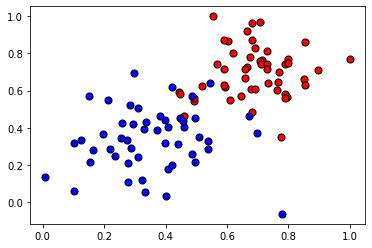

In [6]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 2].values

# visulize the datasets
data_label0 = data.iloc[data.index[data['cat']==0].tolist(), :-1]
data_label1 = data.iloc[data.index[data['cat']==1].tolist(), :-1]

plt.scatter(data_label0.iloc[:, 0], data_label0.iloc[:, 1], s=50, color='red', edgecolor='black');
plt.scatter(data_label1.iloc[:, 0], data_label1.iloc[:, 1], s=50, color='blue', edgecolor='black' );

In [7]:
np.random.seed(40)

# define the step function
def stepFunction(t):
    return int(t>0) 

In [8]:
def prediction(X, W, b):
    """
    Make predictions of '1' or '0' based on the result of linear combination.
    
    Params:
    ------
        X :a 1x2 numpy.ndarray. The coordinates of a single point.
        W: a 2x1 numpy.ndarray. The weights to each feature of a point.
        
    Returns:
    --------
        1 or 0. Based on the stepFunction.
        
        
    NOTES:
        As the data type of the result from np.matmul() is a 1 dimentinal numpy.ndarray,
        so we need to use index 0 to extract the inside element.
    
    """
    return stepFunction((np.matmul(X, W)+b)[0])

In [9]:
# perceptron step to update the weights based on all points in 'just one' iteration
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    """
    Update weights and bias each time iterating the points.
    
    Parameters:
    ----------
        X: a nx2 numpy 2D array. Each entry represents a set of coordinates. 
           It represents the 0th and 1st column in data.csv.
           
        y: actual labels for the datapoints. It represents the 2nd column in data.csv
        
        W: a 2x1 2D numpy array. Weights for the linear equation.
        
        b: Bias value for the linear equation.
        
        learning_rate: float. small steps in changing weights and bias when necessary.
     
     Returns:
        new weights and bias.    
    
    """
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b 

In [10]:
# For plotting purposes, this function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,

def trainPerceptronAlgorithm(X, y, learn_rate = 0.001, num_epochs = 50):
    """
    Runs the perceptron algorithm repeatedly on the dataset, and returns 
    a few of the boundary lines obtained in the iterations, for plotting purposes.
    """
    np.random.seed(40)
    x_min, x_max = min(X.T[0]), max(X.T[0])  # the minimum and maximun value in Variable x0 (column 0 in data.csv)
    y_min, y_max = min(X.T[1]), max(X.T[1])  # the minimum and maximun value in Variable x1 (column 1 in data.csv)
    
    W = np.array(np.random.rand(2,1))  # Initialize the W weights between (0, 1)
    b = np.random.rand(1)[0] + x_max  # Initialize the Bias b between (0, 1)
    
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        
        # each entry in the boundary_lines represents a linear equation.
        boundary_lines.append((-W[0]/W[1], -b/W[1])) 
#     print(boundary_lines)
    return boundary_lines

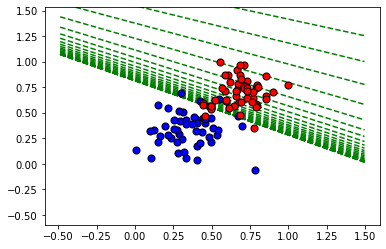

In [11]:
# visulize the result
def train_plot(data, learn_rate = 0.001, num_epochs = 50):
    

    # Divide the features and labels
    X = data.iloc[:, :-1].values
    y = data.iloc[:, 2].values

    # Visualize the regresison process
    boundary_lines = trainPerceptronAlgorithm(X, y, learn_rate = 0.001, num_epochs = 50)
    
    x_min, x_max = min(X.T[0]), max(X.T[0])  # the minimum and maximun value in Variable x0 (column 0 in data.csv)
    y_min, y_max = min(X.T[1]), max(X.T[1])  # the minimum and maximun value in Variable x1 (column 1 in data.csv)
    
    x_range = x_max - x_min
    x_lower = x_min - x_range/2
    x_upper = x_max + x_range/2
    
    y_range = y_max - y_min
    y_lower = y_min - y_range/2
    y_upper = y_max + y_range/2
    
    counter = len(boundary_lines)
    for slope, intercept in boundary_lines:
        counter -= 1
        color = [1 - 0.92 ** counter for _ in range(3)]
        plt.plot([x_lower, x_upper],[x_lower * slope + intercept, x_upper * slope + intercept], linestyle='--', \
                 color = 'green');
    
    
    # Extract the data of two different classes
    data_label0 = data.iloc[data.index[data['cat']==0].tolist(), :-1]
    data_label1 = data.iloc[data.index[data['cat']==1].tolist(), :-1]
    
    # Visulize the original datasets in scatter plot
    plt.scatter(data_label0.iloc[:, 0], data_label0.iloc[:, 1], s=50, color='red', edgecolor='black', zorder=10);
    plt.scatter(data_label1.iloc[:, 0], data_label1.iloc[:, 1], s=50, color='blue', edgecolor='black', zorder=9 );
    plt.ylim([y_lower, y_upper]);
    plt.show()

train_plot(data, learn_rate = 0.001, num_epochs = 50)

### VERSION 2.0

___Updates:___ Algorithm for making decision boundary stays the same except the codes for visualization.

**Use `sns.scatterplot()` to make the scatter plot ___for convenience___.**

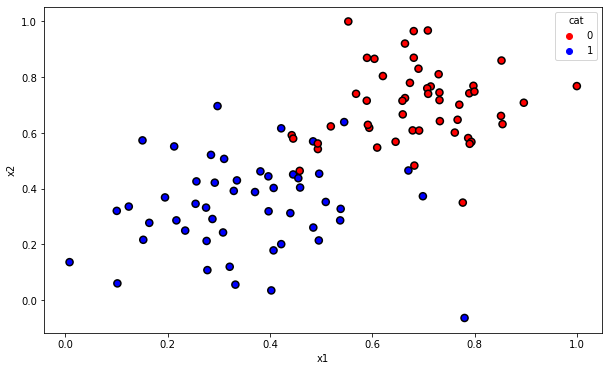

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, \
                x='x1', \
                y='x2', \
                hue='cat', \
                palette=['red', 'blue'], \
                s=50, \
                edgecolor='k', \
                linewidth=1.5);

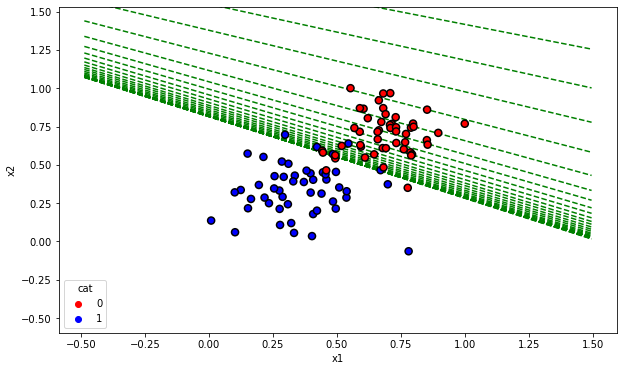

In [16]:
# Visulize the result
def train_plot(data, learn_rate = 0.001, num_epochs = 50):
    
    plt.figure(figsize=(10, 6))
    # Divide the features and labels
    X = data.iloc[:, :-1].values
    y = data.iloc[:, 2].values

    # Visualize the regresison process
    boundary_lines = trainPerceptronAlgorithm(X, y, learn_rate = 0.001, num_epochs = 50)
    
    x_min, x_max = min(X.T[0]), max(X.T[0])  # the minimum and maximun value in Variable x0 (column 0 in data.csv)
    y_min, y_max = min(X.T[1]), max(X.T[1])  # the minimum and maximun value in Variable x1 (column 1 in data.csv)
    
    x_range = x_max - x_min
    x_lower = x_min - x_range/2
    x_upper = x_max + x_range/2
    
    y_range = y_max - y_min
    y_lower = y_min - y_range/2
    y_upper = y_max + y_range/2
    
    counter = len(boundary_lines)
    for slope, intercept in boundary_lines:
        counter -= 1
        color = [1 - 0.92 ** counter for _ in range(3)]
        plt.plot([x_lower, x_upper],[x_lower * slope + intercept, x_upper * slope + intercept], linestyle='--', \
                 color = 'green');
    
    
    # Visulize the original datasets in scatter plot
    sns.scatterplot(data=data, \
                    x='x1', \
                    y='x2', \
                    hue='cat', \
                    palette=['red', 'blue'], \
                    s=50, \
                    edgecolor='k', \
                    zorder=3, \
                    linewidth=1.5)
    
    # Set y value range
    plt.ylim([y_lower, y_upper]);

train_plot(data, learn_rate = 0.001, num_epochs = 50)